### Import Common Modules

In [1]:
import import_ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score, \
                                precision_score, f1_score, recall_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import classification_report

import matplotlib as mpl
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

from traffic_common import get_category_age, get_category_season, get_category_time, drop_features, cleansing, \
                            encode_features, conv2XYarr, transform_dataframe, bar_chart, pie_chart

importing Jupyter notebook from traffic_common.ipynb


### Load Dataset and Pre-processing

In [2]:
traffic_df = pd.read_csv('dataset/seoul_traffic.csv', encoding='euc-kr')

In [3]:
traffic_df = transform_dataframe(traffic_df)

<string>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:39: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:41: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:49: FutureWarning: The default value of regex will change from True to False in a future version.
<string>:51: FutureWarning: The default value of regex will change from True to False in a future version.


In [4]:
traffic_df.head()

,acc_details,occur_date,occur_time,occur_dayofweek,acc_type_b,offender_violation,road_condition_b,wheather_status,road_type_b,offender_vehicle,offender_sex,offender_age,victim_vehicle,victim_sex,victim_age
0,경상,Winter,Dawn,금,기타,기타,젖음/습기,맑음,기타단일로,승용차,남,중년,이륜차,남,미성년
1,중상,Winter,Dawn,금,추돌,안전거리 미확보,서리/결빙,맑음,기타단일로,승합차,남,중년,승용차,남,장년
2,경상,Winter,Dawn,금,추돌,기타,서리/결빙,흐림,기타단일로,승용차,남,중년,승용차,남,중년
3,경상,Winter,Dawn,금,기타,안전거리 미확보,건조,맑음,교차로부근,승용차,남,중년,승용차,남,중년
4,경상,Winter,Dawn,금,정면충돌,신호위반,건조,맑음,교차로내,승용차,남,청년,승용차,남,중년


In [5]:
X = traffic_df.loc[:,'occur_date':]
Y = traffic_df.loc[:,'acc_details']

In [6]:
X = pd.get_dummies(X)
Y = pd.get_dummies(Y).iloc[:,1]

### LogisticRegression

In [7]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

def evaluate(y, pred):
    rmsle_val = rmsle(y, pred)
    rmse_val = rmse(y, pred)
    mae_val = mean_absolute_error(y, pred)
    print('RMSLE: {0:.4f}, RMSE: {1:.4f}, MAE: {2:.4f}'.format(rmsle_val, rmse_val, mae_val))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    random_state=1) 

In [9]:
penalties = ['l1', 'l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100]

for penalty in penalties:
    print('-------------------')
    for C in Cs:
        print('***** penalty : ', penalty)
        print('*** C : ', C)
        logistic = LogisticRegression(penalty=penalty, C=C, solver='saga')    
        logistic.fit(X_train, y_train)
        logistic_pred = logistic.predict(X_test)    
        evaluate(y_test, np.around(logistic_pred))

        print(classification_report(y_test, logistic_pred))
        print("Training set accuracy : {:.4f}".format(logistic.score(X_train,y_train)))
        print("Test set accuracy : {:.4f}".format(logistic.score(X_test,y_test)))
        print("\n\n")

-------------------
***** penalty :  l1
*** C :  0.001
RMSLE: 0.3948, RMSE: 0.5691, MAE: 72.0472
              precision    recall  f1-score   support

           0       0.68      0.94      0.79     48355
           1       0.63      0.20      0.30     26347

    accuracy                           0.68     74702
   macro avg       0.66      0.57      0.55     74702
weighted avg       0.66      0.68      0.62     74702

Training set accuracy : 0.6752
Test set accuracy : 0.6761



***** penalty :  l1
*** C :  0.01
RMSLE: 0.3906, RMSE: 0.5633, MAE: 63.4585
              precision    recall  f1-score   support

           0       0.70      0.89      0.78     48355
           1       0.60      0.30      0.40     26347

    accuracy                           0.68     74702
   macro avg       0.65      0.59      0.59     74702
weighted avg       0.67      0.68      0.65     74702

Training set accuracy : 0.6828
Test set accuracy : 0.6827



***** penalty :  l1
*** C :  0.1
RMSLE: 0.3899, RMS

C:\Users\DI_LAB\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RMSLE: 0.3899, RMSE: 0.5625, MAE: 62.2132
              precision    recall  f1-score   support

           0       0.70      0.89      0.78     48355
           1       0.60      0.31      0.41     26347

    accuracy                           0.68     74702
   macro avg       0.65      0.60      0.60     74702
weighted avg       0.67      0.68      0.65     74702

Training set accuracy : 0.6840
Test set accuracy : 0.6836



***** penalty :  l1
*** C :  100


C:\Users\DI_LAB\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


RMSLE: 0.3899, RMSE: 0.5625, MAE: 62.2132
              precision    recall  f1-score   support

           0       0.70      0.89      0.78     48355
           1       0.60      0.31      0.41     26347

    accuracy                           0.68     74702
   macro avg       0.65      0.60      0.60     74702
weighted avg       0.67      0.68      0.65     74702

Training set accuracy : 0.6840
Test set accuracy : 0.6836



-------------------
***** penalty :  l2
*** C :  0.001
RMSLE: 0.3911, RMSE: 0.5640, MAE: 65.4723
              precision    recall  f1-score   support

           0       0.70      0.90      0.79     48355
           1       0.61      0.27      0.38     26347

    accuracy                           0.68     74702
   macro avg       0.65      0.59      0.58     74702
weighted avg       0.67      0.68      0.64     74702

Training set accuracy : 0.6814
Test set accuracy : 0.6819



***** penalty :  l2
*** C :  0.01
RMSLE: 0.3901, RMSE: 0.5627, MAE: 62.6487
         

In [10]:
logistic = LogisticRegression(penalty='l1', C=1, solver='saga')    

In [11]:
logistic.fit(X_train, y_train)
logistic_pred = logistic.predict(X_test) 

<AxesSubplot:title={'center':'Coefficient Values'}>

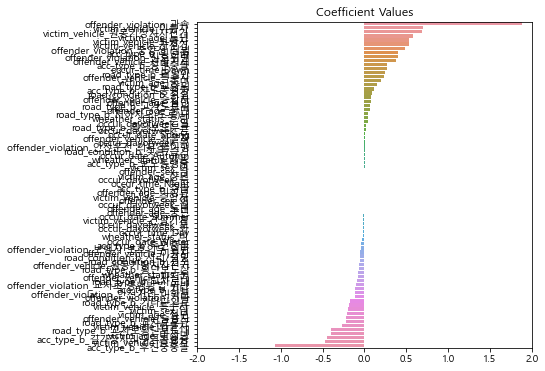

In [12]:
fig, axs = plt.subplots(figsize=(6,6), nrows=1, ncols=1)
coeff_df = pd.DataFrame()

coeff = pd.Series(data=logistic.coef_[0], index=X.columns)
colname='Coefficient Values'
coeff_df[colname] = coeff
coeff_high = coeff.sort_values(ascending=False)
coeff_low = coeff.sort_values(ascending=False)
coeff_concat = pd.concat([coeff_high])
axs.set_title(colname)
axs.set_xlim(-2,2)
sns.barplot(x=coeff_concat.values, y=coeff_concat.index, ax=axs)

In [13]:
coeff_high

offender_violation_과속             1.879469e+00
victim_vehicle_이륜차                6.951315e-01
victim_vehicle_원동기장치자전거           6.866590e-01
victim_age_노년                     5.774701e-01
victim_vehicle_보행자                5.386140e-01
victim_vehicle_자전거                5.338671e-01
offender_violation_중앙선 침범         4.835097e-01
acc_type_b_횡단중                    4.046853e-01
offender_violation_신호위반           3.980722e-01
offender_vehicle_건설기계             3.731116e-01
acc_type_b_정면충돌                   2.733788e-01
occur_time_Dawn                   2.664153e-01
road_type_b_터널안                   2.434992e-01
offender_vehicle_특수차              2.307329e-01
victim_age_중년                     1.972615e-01
road_type_b_교량위                   1.478206e-01
acc_type_b_차도통행중                  1.210261e-01
road_condition_b_적설               9.158587e-02
offender_vehicle_승합차              7.940398e-02
offender_age_청년                   7.848007e-02
road_type_b_고가도로위                 6.880817e-02
offender_age_

In [14]:
coeff_low

offender_violation_과속             1.879469e+00
victim_vehicle_이륜차                6.951315e-01
victim_vehicle_원동기장치자전거           6.866590e-01
victim_age_노년                     5.774701e-01
victim_vehicle_보행자                5.386140e-01
victim_vehicle_자전거                5.338671e-01
offender_violation_중앙선 침범         4.835097e-01
acc_type_b_횡단중                    4.046853e-01
offender_violation_신호위반           3.980722e-01
offender_vehicle_건설기계             3.731116e-01
acc_type_b_정면충돌                   2.733788e-01
occur_time_Dawn                   2.664153e-01
road_type_b_터널안                   2.434992e-01
offender_vehicle_특수차              2.307329e-01
victim_age_중년                     1.972615e-01
road_type_b_교량위                   1.478206e-01
acc_type_b_차도통행중                  1.210261e-01
road_condition_b_적설               9.158587e-02
offender_vehicle_승합차              7.940398e-02
offender_age_청년                   7.848007e-02
road_type_b_고가도로위                 6.880817e-02
offender_age_